In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [2]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Get GPU details
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("No GPU available, using CPU")

Num GPUs Available:  0
No GPU available, using CPU


In [3]:
# Load your data
# Upload your .npy files to Colab first, then load them
data = np.load('data\mnist_data.npz')  # Shape: (20000, 32, 32, 3)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train[:,1], num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")



Training data shape: (20000, 28, 28)
Training labels shape: (20000, 2)
Test data shape: (3000, 28, 28)


In [4]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train_cat = keras.utils.to_categorical(y_train, num_classes= 10)

# normalised the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Split training into training and validation sets

In [5]:
# SPLIT INTO TRAIN AND VALIDATION SETS
from sklearn.model_selection import train_test_split
y_train_cat = keras.utils.to_categorical(y_train, num_classes = 10)

# Split training data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train_cat,
    test_size=0.2,
    random_state=42
)

print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(40000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

kernel_size = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

kernel_size = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=kernel_size, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, LeakyReLU

kernel_size = (5, 5)
model = Sequential()
filter = 32
deep_filter = 64
deep_deep_filter = 96
deep_deep_deep_filter = 128

# Convolutional Layer
model.add(Conv2D(filters=filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.5))

model.add(Conv2D(filters=deep_filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=deep_filter, kernel_size=kernel_size, input_shape=(32, 32, 3), activation=LeakyReLU(alpha=0.1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\micha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## Early Stopping

In [ ]:
## setting for early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

## Data Augmentation

In [24]:
## data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

## Fitting the Model

In [28]:
## Fitting the model
epoch = 5
r = model.fit(train_generator,
              epochs=epoch,
              validation_data=(X_val, y_val),
              verbose = 1,
              callbacks=[early_stop]
             )

Epoch 1/5
 24/313 ━━━━━━━━━━━━━━━━━━━━ 37s 129ms/step - accuracy: 0.6767 - loss: 0.9455

KeyboardInterrupt: 

## Training loss and accuracy

In [ ]:
# Evaluate on training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8661 - loss: 0.3874
Training Loss: 0.3845
Training Accuracy: 0.8674
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.5235
Test Loss: 0.5437
Test Accuracy: 0.8257


## GenAI Tool

### GenAI Setup

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=".venv/.env")  
api_key = os.environ.get("Google_API_key")

In [9]:
from openai import OpenAI
from IPython.display import Markdown, display
import os


if api_key:
    print(f"Google API Key exists and begins {api_key[:2]}")
else:
    print("Google API Key not set (and this is optional)")

Google API Key exists and begins AI


In [10]:
train_loss_val = r.history['loss']
test_loss_val = r.history['val_loss']

NameError: name 'r' is not defined

### GenAI Prompt

Generating a Prompt for The AI to understand full context of the model and the dataset.

In [15]:
def generate_feedback_prompt(
    model_summary,
    training_history,
    num_classes=10,
    input_shape="32x32x3",
    num_train_samples=50000,
    num_val_samples=10000,
    optimizer="adam",
    learning_rate=None,
    loss_function="categorical_crossentropy",
    batch_size=batch_size,
    epochs_trained=epoch,
    train_accuracy=train_accuracy,
    val_accuracy=test_accuracy,
    train_loss=train_loss,
    val_loss=test_loss_val[-1],
    total_params=model.count_params(),
    regularization_used=None,
    data_augmentation=True,
    early_stopping_used=True,
    additional_context=""
):
    prompt = f"""
You are acting as an **automated deep learning optimization assistant**.
Your task is to analyze a CNN trained on the **CIFAR-10 dataset** (60,000 32x32x3 images across 10 classes), and provide **expert-level feedback** to help the user improve model performance, reduce overfitting, and optimize architecture and training choices.

Below is the full model and training context:

### 📘 MODEL DETAILS
{model_summary}

- Total parameters: {total_params}
- Input shape: {input_shape}
- Number of classes: {num_classes}

### ⚙️ TRAINING CONFIGURATION
- Optimizer: {optimizer}
- Learning rate: {learning_rate}
- Loss function: {loss_function}
- Batch size: {batch_size}
- Epochs trained: {epochs_trained}
- Regularization used: {regularization_used}
- Data augmentation: {data_augmentation}
- Early stopping used: {early_stopping_used}

### 📊 DATASET INFO
- Training samples: {num_train_samples}
- Validation/test samples: {num_val_samples}

### 📈 TRAINING PERFORMANCE
- Final training accuracy: {train_accuracy}
- Final validation accuracy: {val_accuracy}
- Final training loss: {train_loss}
- Final validation loss: {val_loss}

### 🧠 TRAINING HISTORY (partial or full log)
{training_history}

### 💬 ADDITIONAL CONTEXT / CONSTRAINTS
{additional_context}

---

### 🧩 YOUR TASK
Provide **targeted, actionable recommendations** to improve the CNN model based on the provided context.
Include detailed reasoning for each suggestion.

Focus your analysis on:
1. **Architecture improvements** – e.g., depth, convolutional filter size, number of filters, activation functions, skip connections, and normalization.
2. **Regularization & generalization** – e.g., dropout, batch normalization, data augmentation, L2 weight decay, label smoothing.
3. **Optimizer and training schedule** – suggest changes like learning rate decay, adaptive optimizers, or cyclical learning rates.
4. **Training diagnostics** – identify overfitting, underfitting, or vanishing gradients from performance trends.
5. **Parameter efficiency** – if model is over-parameterized or under-powered.
6. **Augmentation & preprocessing** – improvements to data pipeline or normalization.
7. **Metric-based advice** – respond intelligently to differences between training and validation accuracy/loss.

Each suggestion needs a ranking e.g. high, medium and low, base this on importance of suggestion. 

Output your response in a dot point form with the following keys:

"""
    return prompt


messages = [{"role": "user", "content": generate_feedback_prompt(
    model.get_config(),
    model.history.history)
}]

NameError: name 'batch_size' is not defined

### Calling GenAI to Assess ML Model

In [19]:
gemini = OpenAI(api_key=api_key, base_url="https://generativelanguage.googleapis.com/v1beta/openai/")
model_name = "gemini-2.0-flash"

response = gemini.chat.completions.create(model=model_name, messages=messages)
answer = response.choices[0].message.content

display(Markdown(answer))

NameError: name 'messages' is not defined

Text(0.5, 1.0, 'Accuracy evolution')

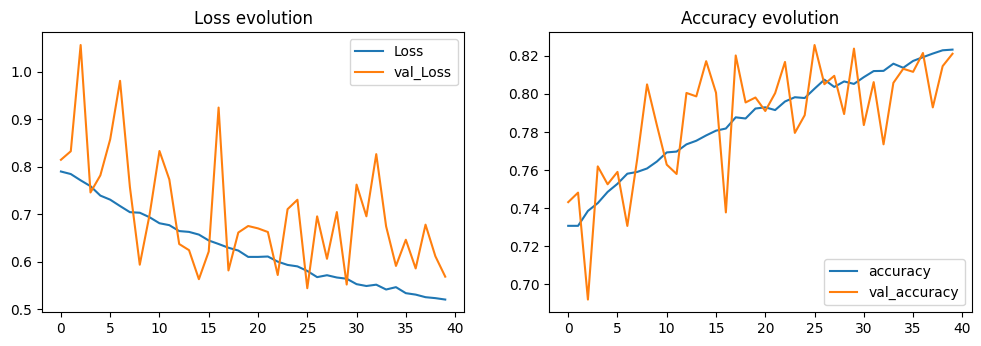

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
# Make predictions on test set
predictions = model.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [ ]:
# Create ID column
ids = np.arange(20001, 20001 + len(predictions)).reshape(-1, 1)

# Concatenate ID column with predictions
results = np.concatenate([ids, predictions], axis=1)

# Convert to DataFrame with column names
column_names = ['ID'] + [f'Class{i}' for i in range(predictions.shape[1])]
results_df = pd.DataFrame(results, columns=column_names)



In [ ]:
# Save to CSV
# Convert ID column to integer type
results_df['ID'] = results_df['ID'].astype(int)
results_df.to_csv("CNN-submission-pt2.csv", index=False)

# Display first few predictions
print("\nFirst 10 predictions:")
print(results_df.head(10))

# Optional: Save the model
model.save('resnet_model.h5')
print("\nModel saved to 'resnet_model.h5'")


First 10 predictions:
      ID        Class0    Class1        Class2        Class3        Class4  \
0  20001  3.955708e-05  0.000012  4.759216e-02  5.788257e-03  8.210395e-02   
1  20002  1.443286e-07  0.999674  2.352326e-09  4.889082e-09  1.173484e-10   
2  20003  2.945889e-03  0.000493  2.028191e-01  2.921101e-02  1.918954e-01   
3  20004  2.776332e-04  0.000109  2.584400e-02  5.533613e-01  1.553768e-02   
4  20005  3.241180e-04  0.003362  2.418623e-02  2.637264e-01  4.796295e-01   
5  20006  1.643343e-03  0.000005  2.389097e-02  1.203796e-02  8.810790e-01   
6  20007  1.881667e-01  0.004473  2.451628e-02  7.070147e-01  3.795098e-03   
7  20008  2.142021e-01  0.002144  2.316307e-01  6.000803e-03  1.384636e-01   
8  20009  2.242879e-05  0.000058  8.702299e-08  8.490134e-07  2.016161e-10   
9  20010  1.050079e-08  0.999109  9.923616e-12  5.414306e-11  6.399272e-14   

         Class5        Class6        Class7        Class8    Class9  
0  3.434508e-02  9.767968e-03  8.203292e-01  4.5